# Hand Written Digits Classification (MNIST Dataset)
using Keras API with Tensorflow as backend

In [1]:
import tensorflow as tf

In [3]:
#Import dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


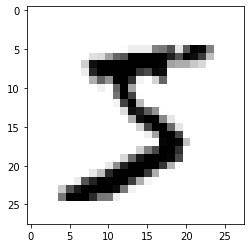

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [6]:
y_train[0]

5

### Converting output variable data into categorical variables using one-hot encoding


In [10]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [12]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Preprocessing

In [13]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [14]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Normalization

In [16]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10


In [18]:
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [19]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

### Creating the models


Here, I have created two models, they are all the same just I've used different two optimizers namely Stochastic Gradient Descent & ADAM. (ADAM is said to perform better (mostly) than other optimizers so just wanted to check)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model_1 = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [43]:
model_2 = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [23]:
model_1.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the Models

In [25]:
h_1 = model_1.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1852 - accuracy: 0.9452
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1409 - accuracy: 0.9590
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1151 - accuracy: 0.9663
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0977 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9793
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0581 - accuracy: 0.9835
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.051

In [26]:
h_2 = model_2.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2109 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1010 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [27]:
loss_1, accuracy_1 = model_1.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy_1 * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9737
test set accuracy:  97.36999869346619


In [28]:
loss_2, accuracy_2 = model_2.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy_2 * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.9769
test set accuracy:  97.68999814987183


Accuracy using adam optimizer (97.68) > Accuracy using sgd optimizer (97.36)

### Predictions

In [29]:
preds = model_2.predict(x_test_norm)

print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


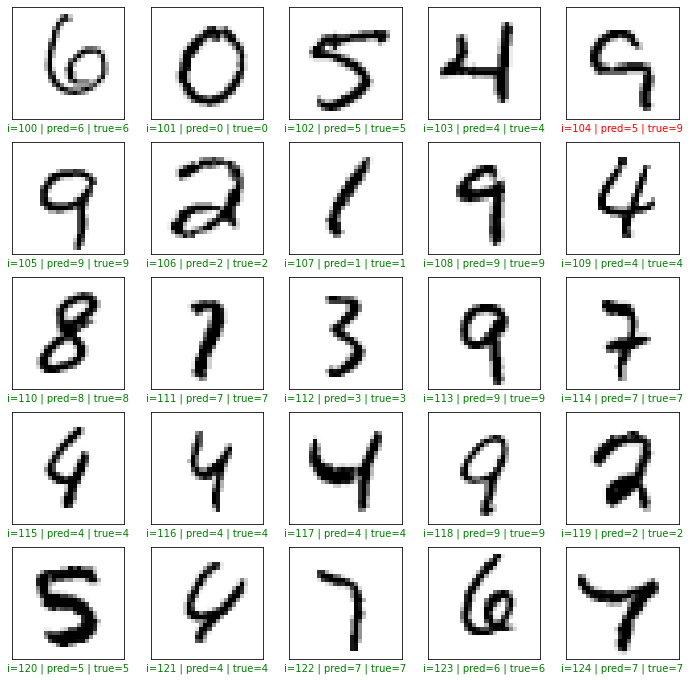

In [35]:
plt.figure(figsize = (12, 12))

start_index = 100

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

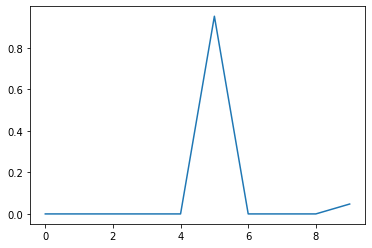

In [37]:
index = 104

plt.plot(preds[index])
plt.show()